### Composite GPH plot of wavebreaking events. 

In [2]:
#relevant import statements
import numpy as np
import math
import xarray as xr 
import pickle 
import pandas as pd
import matplotlib.ticker as mticker

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import cartopy.feature
from cartopy.util import add_cyclic_point
import cartopy.crs as ccrs

/knight/anaconda_jan21/envs/aug21/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
infile = open("100gph_wbALL.p", 'rb') 
gph100 = pickle.load(infile)
infile.close()

In [4]:
gph100.shape

(42, 152, 361, 1440)

In [5]:
gph100= np.delete(gph100,[120],1)
gph100.shape 

(42, 151, 361, 1440)

### Import files for making the DATA dictionary later.

In [6]:
##save lat lon indices
lats = []
lons = []
testfile = xr.open_dataset("../../era5/gph/era5_gph_1979.nc")
lats.append(testfile.latitude.values)
lons.append(testfile.longitude.values)

lats = lats[0]
lons = lons[0]

/knight/anaconda_jan21/envs/aug21/lib/python3.8/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'rasterio' loading failed:
(numpy 1.24.3 (/nfs/home11/grad/2020/ef935217/.local/lib/python3.8/site-packages), Requirement.parse('numpy<1.23.0,>=1.16.5'), {'scipy'})
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


### Loop and collect data from events.

In [11]:
year = [0,0,1,2,2,3,4,4,4,6,6,7,9,9,10,11,11,12,13,14,14,14,15,15,16,16,16,
        20,21,22,23,23,25,25,28,28,29,30,32,34,34,34,36,36,36,37,38,38,40,40]
date = [69,110,86,55,65,39,50,57,111,74,99,78,93,117,84,82,105,73,106,48,66,114,81,
        102,81,105,120,127,96,78,70,122,107,122,77,105,38,85,67,83,98,114,73,89,114,93,
        44,87,32,97]

print(len(year))
print(len(date))

50
50


In [118]:
##at 0 days lead at first
events = np.empty((len(year),361,1440))

In [119]:
for i in range(0,len(year)):
    print(i)

    events[i,:,:] = gph100[year[i],date[i]+15,:,:]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [120]:
events.shape

(50, 361, 1440)

In [121]:
DATA = xr.DataArray(data= np.mean(events,axis=0), 
                       dims = ["lat","lon"],
                       coords = dict(
                           lat = lats,
                           lon = lons)
                      )

In [122]:
DATA

<xarray.DataArray (lat: 361, lon: 1440)>
array([[15194.007263  , 15194.007263  , 15194.007263  , ...,
        15194.007263  , 15194.007263  , 15194.007263  ],
       [15196.10566386, 15196.12057212, 15196.12057212, ...,
        15196.07543323, 15196.07543323, 15196.09053262],
       [15198.3398318 , 15198.3398318 , 15198.3698713 , ...,
        15198.33999108, 15198.33986366, 15198.30966488],
       ...,
       [16570.75528797, 16570.75538354, 16570.69387105, ...,
        16571.11745031, 16570.93663991, 16570.84594801],
       [16570.77010066, 16570.77013252, 16570.75458716, ...,
        16571.13245413, 16570.95148445, 16570.87627421],
       [16570.81479358, 16570.78414883, 16570.75395005, ...,
        16571.11678135, 16570.99640036, 16570.89057722]])
Coordinates:
  * lat      (lat) float32 90.0 89.75 89.5 89.25 89.0 ... 1.0 0.75 0.5 0.25 0.0
  * lon      (lon) float32 -180.0 -179.8 -179.5 -179.2 ... 179.2 179.5 179.8

/tmp/ipykernel_5245/1476096266.py:12: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_edgecolor('none')


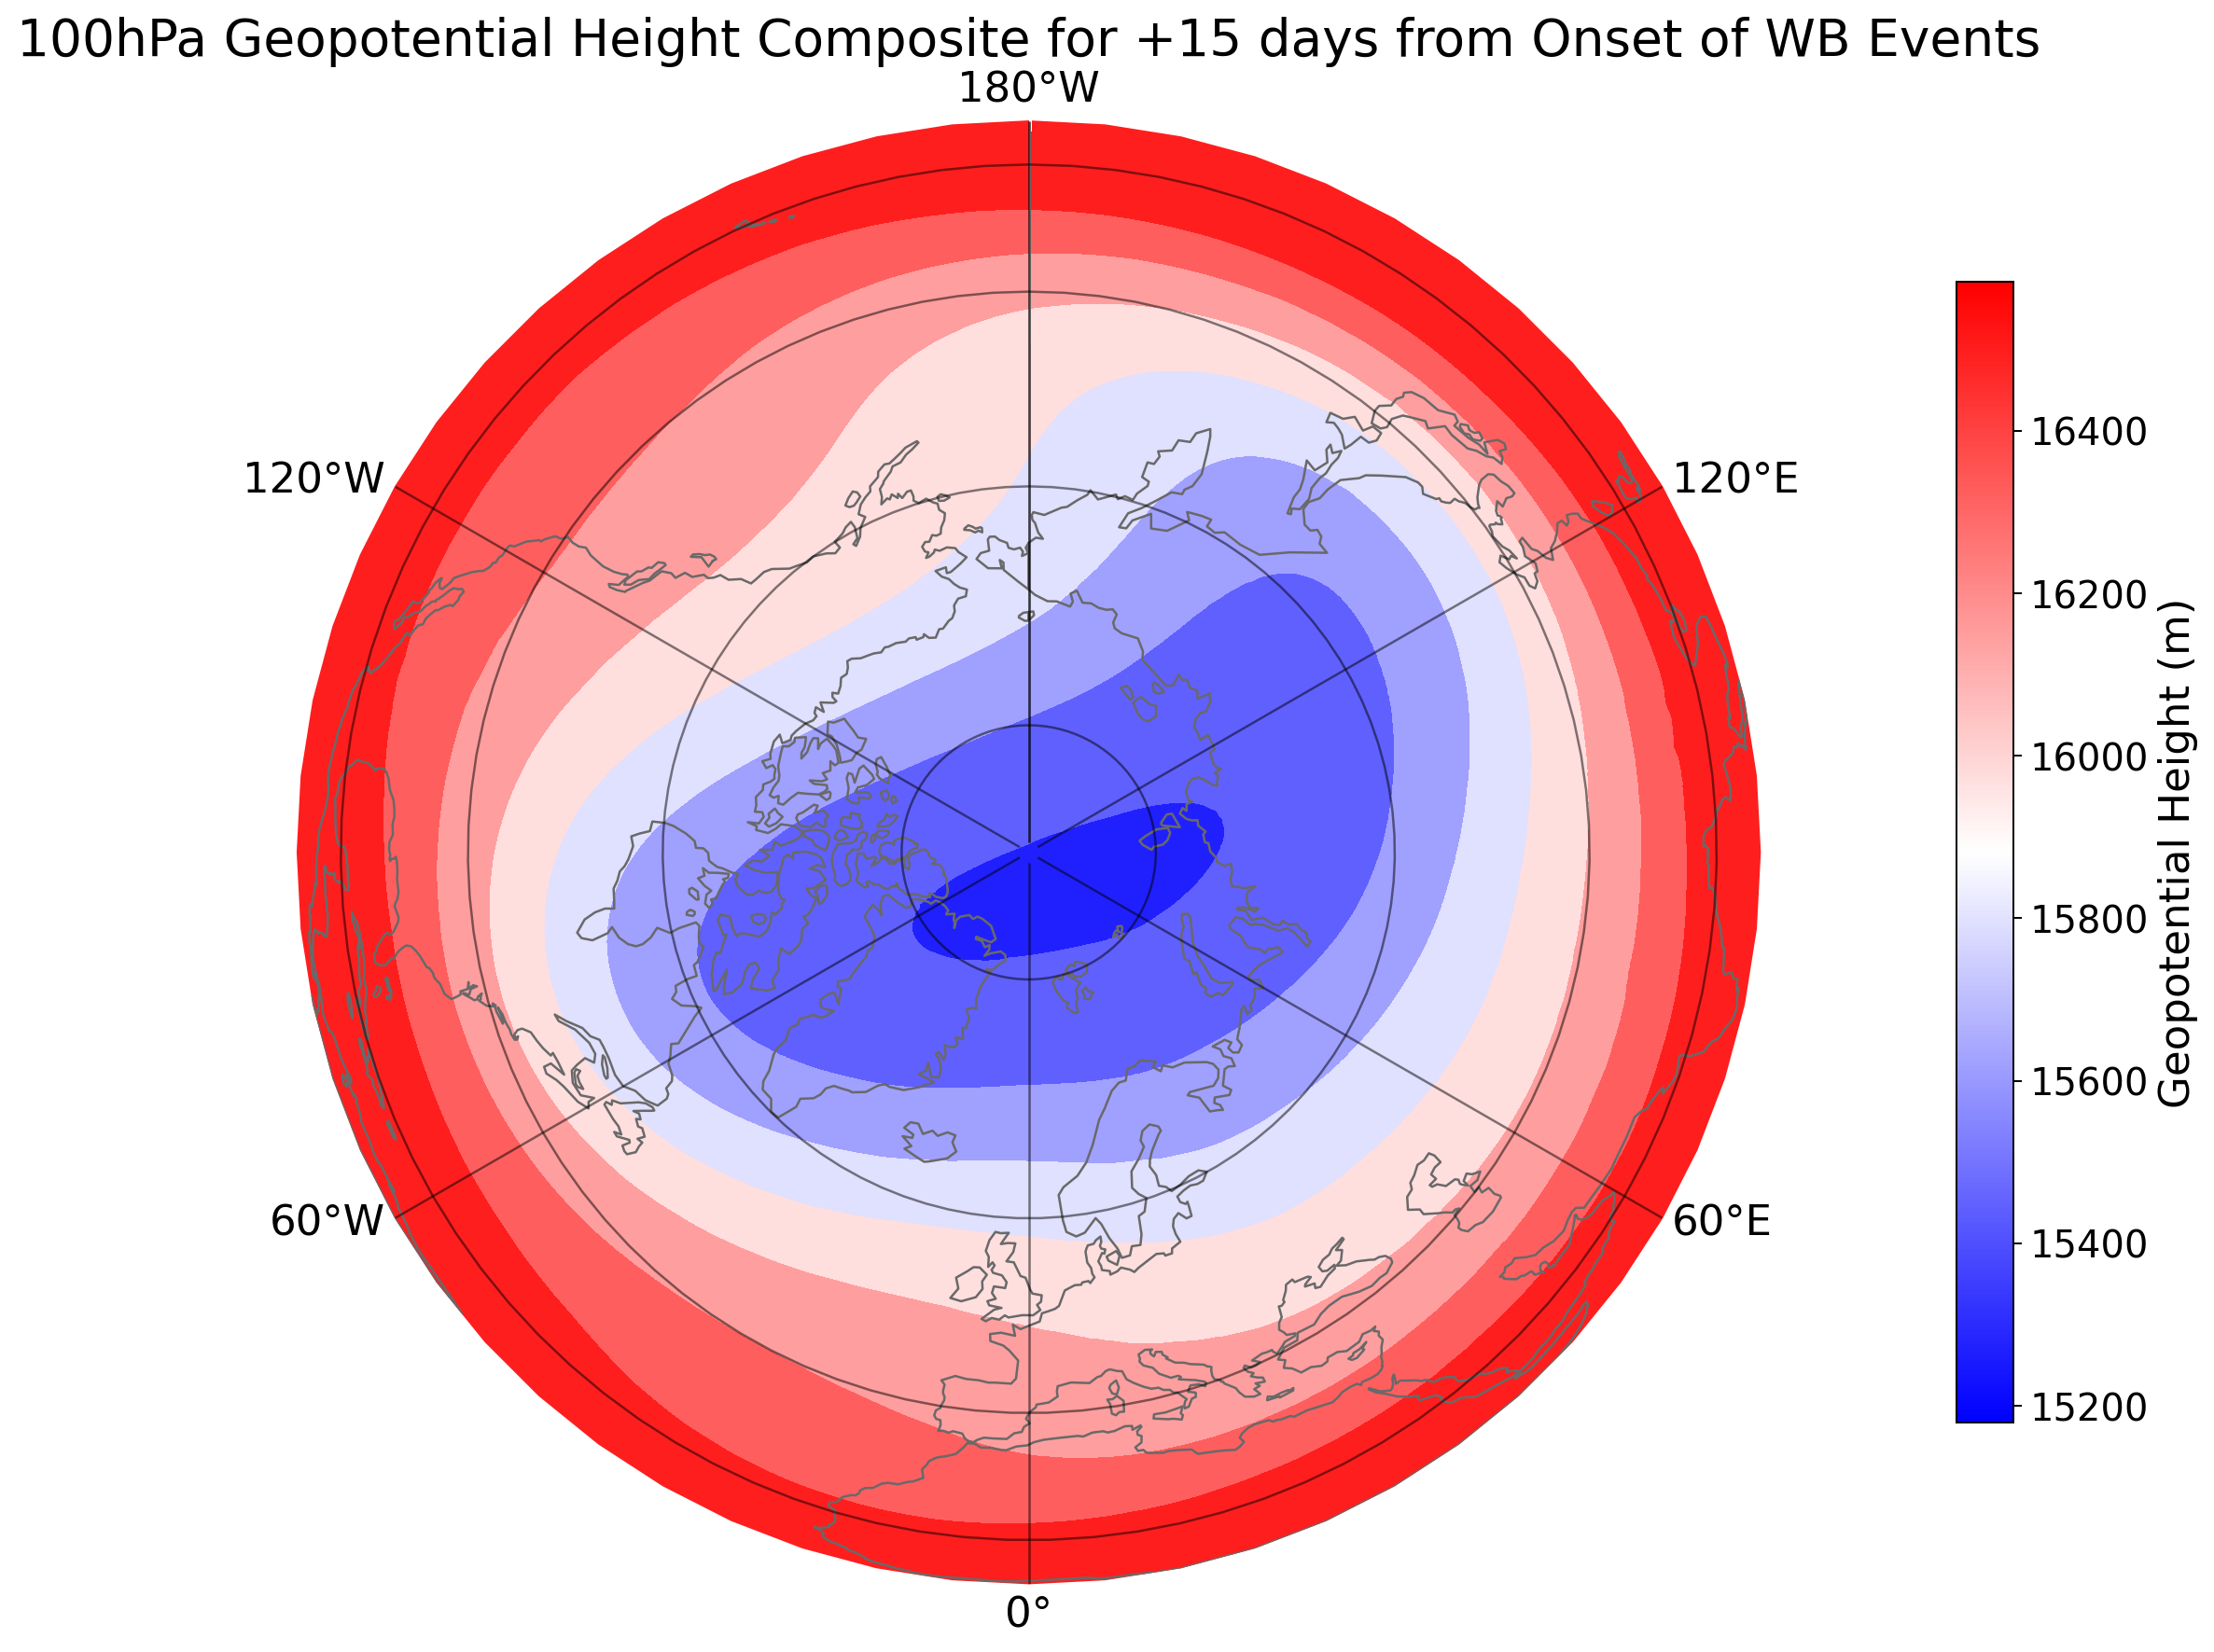

In [123]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.colors
import matplotlib.cm

%matplotlib inline
plt.figure(figsize=(15,15),dpi=180)
plt.tight_layout()
ax = plt.axes(projection=ccrs.Orthographic(0,90))
plt.title("100hPa Geopotential Height Composite for +15 days from Onset of WB Events", fontsize = 22)
ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='dimgray',facecolor='none')
#ax.set_extent([-180,180,0,90],ccrs.PlateCarree())
ax.outline_patch.set_edgecolor('none')
gl = ax.gridlines(draw_labels=True,linewidth=1, color='black', alpha=0.5)
gl.xlabels_top = True
gl.ylabels_left = False
gl.ylabels_right = False
gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 18, 'color': 'black'}

ax.contourf(lons,lats,DATA,transform=ccrs.PlateCarree(),cmap="bwr")

cmap = matplotlib.cm.bwr
norm = matplotlib.colors.Normalize(vmin = np.min(DATA.values),vmax=np.max(DATA.values))

cbar = plt.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, location = 'right', shrink=0.6, pad=0.1) #add colorbar
#tick_locator = ticker.MaxNLocator(nbins=10)
#cbar.locator = tick_locator
#cbar.update_ticks()
cbar.set_label(label='Geopotential Height (m)', size=18)
cbar.ax.tick_params(labelsize=16)

#plt.show()
plt.savefig("WB_day_pl15_map.png")